<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/operanalyst/dynprog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamické programování

## Princip optimality

Dynamické programování je motoda operační analýzy, která je určena pro optimalizaci problému, který lze rozdělit do etap. Předpokládejme, že těchto etap je $n$. Potom při řízení můžeme v každé etapě použít řízení $u_i$, čímž ovlivňujeme vývoj stavu řízeného systému. Tento systém nabývá postupně stavů $x_i$. Z matematického hlediska jak řízení $u_i$, tak stavy $x_i$ mohou být vektory.

Cílem je optimalizovat účelovou funkci 

$$J=\sum_{i=0}^{n-1}I_i$$

kde $J$ a $I_i$ jsou např. spotřeba, náklady, apod.

Optimálním řešením je posloupnost vektorů $u=(u_0^*, u_1^*, \dots, u_n^*)$.

R. Bellman formuloval princip optimality: 
> "Optimální strategie hledá optimální pokračování operace vzhledem ke stavu, který nastal v důsledku přijetí předchozího rozhodnutí."

Z tohoto výroku lze odvodit, že rozhodnutí přijaté v každé etapě má vliv na následující etapy. Pouze poslední etapa (řízení $u_{n-1}$) má vliv jen na danou etapu. Víme tedy, že $J_{n-1}=I_{n-1}$.

Pro předposlední etapu (řízení $u_{n-2}$) hledáme

$$J_{n-2}=\max_{u_{n-2}} \{I_{n-2}+J_{n-1} \}$$

Obdobné můžeme vyjádřit pro všechny etapy, včetně etapy první

$$J_{1}=\max_{u_{1}} \{I_{1}+J_{2} \}$$

současně platí, že 

$$J_{1}=J$$

Při použití této metody se v podstatě posloupnost prochází dvakrát. Poprvé od konce k počátku, kdy se hledá podmíněně optimální řízení. Podruhé se prochází od počátku do konce, kdy se furmuluje optimální posloupnost řídící kroků.


## Příklad

Předpokládejme, že letoun se nachází ve výšce $h_A$ a pohybuje se rychlostí $v_A$. Má být dosaženo výšky $h_B \gt h_A$ a rychlosti $v_B \gt v_A$ a to tak, aby spotřeba paliva byla minimální. Spotřeba paliva pro změnu rychlosti, případně pro změnu výšky v daném stavu letounu jsou dány tabulkou.

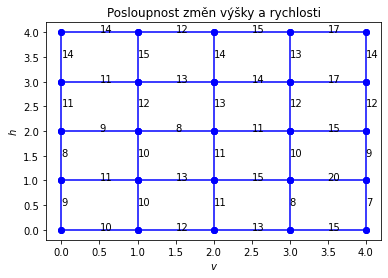

In [11]:
from matplotlib import pyplot as plt

I = {
    0:{0: (10, 9), 1: (12, 10), 2: (13, 11), 3: (15, 8), 4: (None, 7)},
    1:{0: (11, 8), 1: (13, 10), 2: (15, 11), 3: (20, 10), 4: (None, 9)},
    2:{0: (9, 11), 1: (8, 12),  2: (11, 13), 3: (15, 12), 4: (None, 12)},
    3:{0: (11, 14), 1: (13, 15), 2: (14, 14), 3: (17, 13), 4: (None, 14)},
    4:{0: (14, None), 1: (12, None), 2: (15, None), 3: (17, None), 4: (None, None)} 
     }

for x in range(5):
  for y in range(5):
    labelA, labelB = I[y][x]
    if not labelA is None:
      plt.plot([x, x + 1], [y, y], '-bo')
      plt.text(x + 0.5, y, labelA)
    if not labelB is None:
      plt.plot([x, x], [y, y  + 1], '-bo')
      plt.text(x, y + 0.5, labelB)

plt.xlabel('$v$')
plt.ylabel('$h$');
plt.title('Posloupnost změn výšky a rychlosti');
